<a href="https://colab.research.google.com/github/joaopaulolndev/deep-learning-keras-projects/blob/master/Petr4/Petr4RecorrenteUmValor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
import numpy as np
import pandas as pd

from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt

In [0]:
# Carrega arquivo de entrada https://drive.google.com/open?id=1ZCOa8Z2Iq78AgvDjqEATOuSb40UZw-Jy
file_entrada = drive.CreateFile({'id':'1ZCOa8Z2Iq78AgvDjqEATOuSb40UZw-Jy'}) 
file_entrada.GetContentFile('petr4_treinamento.csv')  
base = pd.read_csv('petr4_treinamento.csv')

In [0]:
base = base.dropna()

In [0]:
base_treinamento = base.iloc[:, 1:2].values

In [0]:
normalizador = MinMaxScaler(feature_range=(0,1))

In [0]:
base_treinamento_normalizada = normalizador.fit_transform(base_treinamento)

In [0]:
previsores = []
preco_real = []

In [0]:
for i in range(90, 1242):
  previsores.append(base_treinamento_normalizada[i-90:i, 0])
  preco_real.append(base_treinamento_normalizada[i, 0])

In [0]:
previsores, preco_real = np.array(previsores), np.array(preco_real)

In [0]:
previsores = np.reshape(previsores, (previsores.shape[0], previsores.shape[1], 1))

In [0]:
regressor = Sequential()
regressor.add(LSTM(units=100, return_sequences=True, input_shape = (previsores.shape[1], 1 )))
regressor.add(Dropout(0.3))

In [0]:
regressor.add(LSTM(units=50, return_sequences=True)) # na ultima camada nao pode ter return_sequences
regressor.add(Dropout(0.3))

regressor.add(LSTM(units=50, return_sequences=True)) # na ultima camada nao pode ter return_sequences
regressor.add(Dropout(0.3))

In [0]:
regressor.add(LSTM(units=50)) # na ultima camada nao pode ter return_sequences
regressor.add(Dropout(0.3))

In [0]:
regressor.add(Dense(units=1, activation='linear'))

In [0]:
regressor.compile(optimizer='rmsprop', loss='mean_squared_error', metrics=['mean_absolute_error'])

In [0]:
regressor.fit(previsores, preco_real, epochs=100, batch_size=32 ) #importante rodar 100 epocas nesse tipo de algoritimos

Epoch 1/100
1152/1152 [==============================] - 14s 12ms/step - loss: 0.0342 - mean_absolute_error: 0.1379
Epoch 2/100
1152/1152 [==============================] - 11s 9ms/step - loss: 0.0172 - mean_absolute_error: 0.1017
Epoch 3/100
1152/1152 [==============================] - 11s 9ms/step - loss: 0.0125 - mean_absolute_error: 0.0865
Epoch 4/100
1152/1152 [==============================] - 11s 9ms/step - loss: 0.0122 - mean_absolute_error: 0.0845
Epoch 5/100
1152/1152 [==============================] - 11s 9ms/step - loss: 0.0089 - mean_absolute_error: 0.0710
Epoch 6/100
1152/1152 [==============================] - 11s 9ms/step - loss: 0.0093 - mean_absolute_error: 0.0735
Epoch 7/100
1152/1152 [==============================] - 11s 9ms/step - loss: 0.0082 - mean_absolute_error: 0.0689
Epoch 8/100
1152/1152 [==============================] - 11s 9ms/step - loss: 0.0077 - mean_absolute_error: 0.0667
Epoch 9/100
1152/1152 [==============================] - 11s 10ms/step - loss: 

In [0]:
# Carrega arquivo de entrada https://drive.google.com/open?id=1e6r9K4BosH68LQKuAxRPlyzuOUKwuYPj
file_entrada = drive.CreateFile({'id':'1e6r9K4BosH68LQKuAxRPlyzuOUKwuYPj'}) 
file_entrada.GetContentFile('petr4_teste.csv')  
base_teste = pd.read_csv('petr4_teste.csv')

In [0]:
preco_real_teste = base_teste.iloc[:,1:2].values

In [0]:
base_completa = pd.concat((base['Open'], base_teste['Open']), axis = 0)

In [0]:
entradas = base_completa[len(base_completa) - len(base_teste) - 90:].values

In [0]:
entradas = entradas.reshape(-1,1)

In [0]:
entradas = normalizador.transform(entradas)

In [0]:
X_teste = []

for i in range(90, 112):
  X_teste.append(entradas[i-90:i, 0])

In [0]:
X_teste = np.array(X_teste)
X_teste = np.reshape(X_teste, (X_teste.shape[0], X_teste.shape[1],1) )

In [0]:
previsoes = regressor.predict(X_teste)

In [0]:
previsoes = normalizador.inverse_transform(previsoes)

In [0]:
previsoes.mean()

17.479992

In [0]:
preco_real_teste.mean()

17.87454563636364

In [0]:
preco_real_teste.mean() - previsoes.mean()

0.3945537235218417

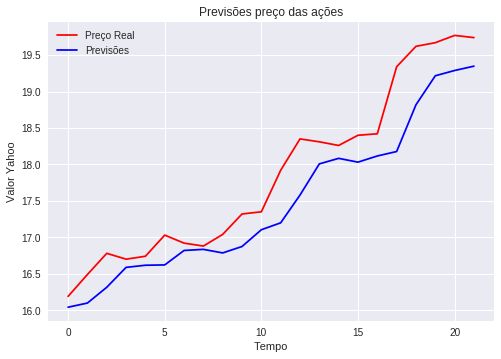

In [0]:
plt.plot(preco_real_teste, color = 'red', label = 'Preço Real')
plt.plot(previsoes, color = 'blue', label = 'Previsões')
plt.title('Previsões preço das ações')
plt.xlabel('Tempo')
plt.ylabel('Valor Yahoo')
plt.legend()
plt.show()